In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Data Science\Deep_Learning\ANN\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
X =df.iloc[:,3:13]
Y =df.iloc[:,13]

In [5]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [7]:
# Create dummy variables
geography = pd.get_dummies(X["Geography"],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [8]:
### conconate 
X = pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1) 

In [9]:
#geography = pd.get_dummies(X["Geography"],drop_first=True)
#gender = pd.get_dummies(X['Gender'],drop_first=True)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [33]:
len(x_train)

8000

In [34]:
len(y_train)

8000

In [35]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,Softmax
from tensorflow.keras.layers import Dropout

In [37]:
#Initialising the ANN
classifier = Sequential()

In [64]:
#Adding the input layer 
classifier.add(Dense(units=11,activation='relu'))

In [65]:
#Adding the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [66]:
#Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [48]:
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #0.8732

In [50]:
#classifier.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy']) #0.8723

In [46]:
#classifier.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy']) #0.0.8756

In [54]:
#classifier.compile(optimizer='adagrad',loss='binary_crossentropy',metrics=['accuracy']) #0.8813

In [58]:
#classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) #0.8721

In [67]:
model_history = classifier.fit(x_train,y_train,validation_split=0.2,batch_size=10,epochs=50)

Epoch 1/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.3194 - val_accuracy: 0.8512 - val_loss: 0.3721
Epoch 2/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8716 - loss: 0.3147 - val_accuracy: 0.8581 - val_loss: 0.3720
Epoch 3/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8691 - loss: 0.3339 - val_accuracy: 0.8519 - val_loss: 0.3717
Epoch 4/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8616 - loss: 0.3353 - val_accuracy: 0.8562 - val_loss: 0.3752
Epoch 5/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8662 - loss: 0.3319 - val_accuracy: 0.8556 - val_loss: 0.3733
Epoch 6/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8724 - loss: 0.3167 - val_accuracy: 0.8525 - val_loss: 0.3721
Epoch 7/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step - accuracy: 0.8703 - loss: 0.3225 - val_accuracy: 0.8525 - val_loss: 0.3698
Epoch 8/50
640/640 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8777 - loss: 0.3180 - val_accuracy:

In [59]:
#list all the data in the history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


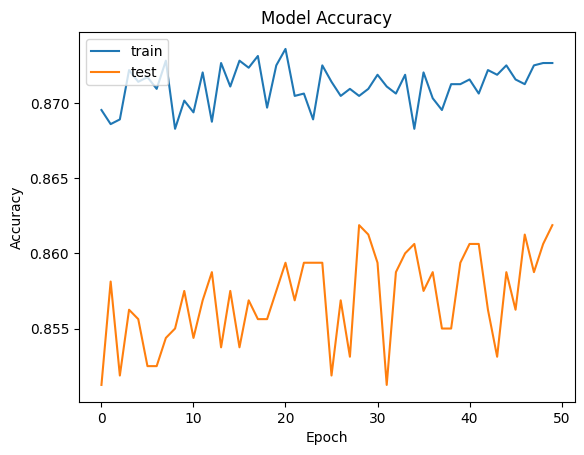

In [70]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()